In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from scipy.signal import convolve2d

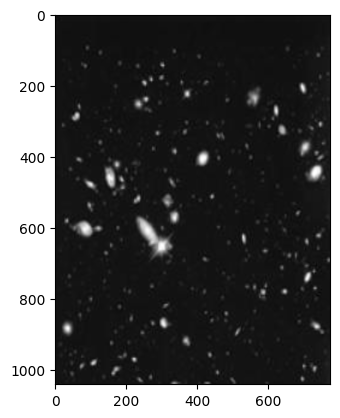

In [6]:
f = np.array(Image.open('./assets/stars.png').convert('L'))

# Plot the image
plt.imshow(f, cmap='gray')
plt.show()


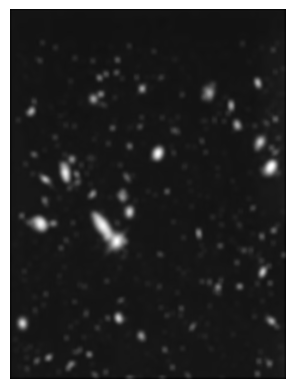

In [20]:
# Low Pass 15x15
n = 15
kernel = np.ones((n,n), np.float32) / n**2

filter = convolve2d(f, kernel, mode='same')

plt.imshow(filter, cmap='gray')
plt.axis('off')
plt.show()

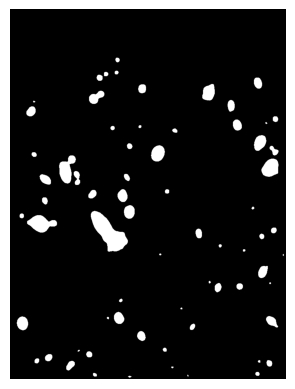

In [21]:
# Threshold 25%
th = 0.25 * 255

# f > th -> each pixel will be True or False according if they are bigger or lower than the threshold
# np.uint8 -> converts True and False into 1 and 0
# and then multiply all by 255, so finally:
#
# Pixels with intensity values greater than th will be set to the maximum value (255),
# while pixels with intensity values less than or equal to th will be set to 0.
threshold = (filter > th).astype(np.uint8) * 255

plt.imshow(threshold, cmap='gray')
plt.axis('off')
plt.show()

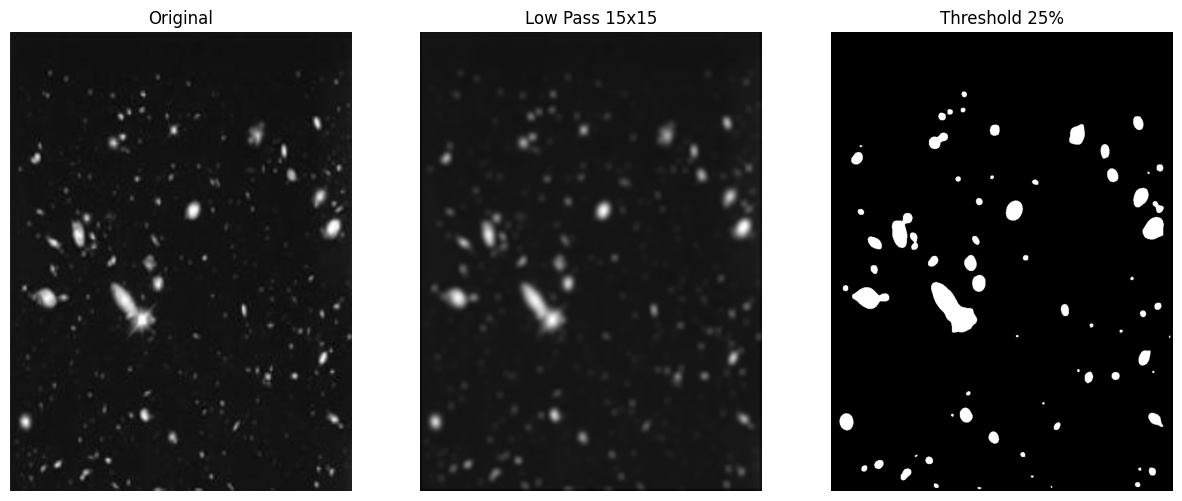

In [22]:
plt.figure(figsize=(15,8)) 
ax = plt.subplot(1,3,1)
ax.imshow(f, cmap='gray')
ax.axis('off')
ax.set_title('Original')

ax = plt.subplot(1,3,2)
ax.imshow(filter, cmap='gray')
ax.set_title(f'Low Pass {n}x{n}')
ax.axis('off')

ax = plt.subplot(1,3,3)
ax.imshow(threshold, cmap='gray')
ax.set_title(f'Threshold {th / 255 * 100:.0f}%')
ax.axis('off')

plt.show()